# Reading the Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('data/china_cancer_patients_synthetic.csv')

# Exploratory Data Analysis

## Dataset shape
This dataset has 10,000 observations and 20 features

In [2]:
dataset.shape

(10000, 20)

## Features name

In [3]:
dataset.columns.to_list()

['PatientID',
 'Gender',
 'Age',
 'Province',
 'Ethnicity',
 'TumorType',
 'CancerStage',
 'DiagnosisDate',
 'TumorSize',
 'Metastasis',
 'TreatmentType',
 'SurgeryDate',
 'ChemotherapySessions',
 'RadiationSessions',
 'SurvivalStatus',
 'FollowUpMonths',
 'SmokingStatus',
 'AlcoholUse',
 'GeneticMutation',
 'Comorbidities']

There are:
- 5 numeric features (4 integers and 1 float) and 15 objects (maybe strings)
- 4 features have missing values (SurgeryData, AlcoholUse, GeneticMutation, Comorbidities)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths      

## Numeric columns

In [5]:
dataset.select_dtypes(['int64', 'float64']).columns.to_list()

['Age',
 'TumorSize',
 'ChemotherapySessions',
 'RadiationSessions',
 'FollowUpMonths']

## Object columns

In [6]:
dataset.select_dtypes(['object']).columns.to_list()

['PatientID',
 'Gender',
 'Province',
 'Ethnicity',
 'TumorType',
 'CancerStage',
 'DiagnosisDate',
 'Metastasis',
 'TreatmentType',
 'SurgeryDate',
 'SurvivalStatus',
 'SmokingStatus',
 'AlcoholUse',
 'GeneticMutation',
 'Comorbidities']

## Statistical summary
- **Age** varies from 18 to 85, (mean 51.6 ± 19.7 std)
- **TumorSize** goes from 0.5 to 14.2 (mean 6.3 ± 2.2 std)
- **ChemotherapySessions** goes from 0 to 20 (mean 3.9 ± 6.2 std)
- **RadiationSessions** goes from 0 to 30 (mean 3.0 ± 7.3 std)
- **FollowUpMonths** goes from 1 to 60 (mean 30.4 ± 17.2 std)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.60020,19.705608,18.0,35.0,51.0,69.0,85.0
TumorSize,10000.0,6.33904,2.234999,0.5,4.8,6.4,7.9,14.2
ChemotherapySessions,10000.0,3.99900,6.203600,0.0,0.0,0.0,8.0,20.0
RadiationSessions,10000.0,3.04640,7.301505,0.0,0.0,0.0,0.0,30.0
FollowUpMonths,10000.0,30.43280,17.162545,1.0,16.0,31.0,45.0,60.0


In [8]:
dataset.describe(include = 'object').T

,count,unique,top,freq
PatientID,10000,10000,CHN-00001,1
Gender,10000,3,Female,3371
Province,10000,13,Guangdong,1841
Ethnicity,10000,6,Han,9110
TumorType,10000,6,Lung,2561
CancerStage,10000,4,II,2971
DiagnosisDate,10000,4383,2016-11-08,8
Metastasis,10000,2,No,7301
TreatmentType,10000,5,Chemotherapy,2072
SurgeryDate,4327,2915,2012-09-23,5


## Missing values
Only 4 columns have missing values. They are:
- SurgeryData (56.73%)
- AlcoholUse (59.21%)
- GeneticMutation (72%)
- Comorbidities (37.15%)

In [9]:
dataset.isna().sum()[dataset.isna().sum() > 0]

SurgeryDate        5673
AlcoholUse         5921
GeneticMutation    7200
Comorbidities      3715
dtype: int64

## Duplicated
There are no duplicated

In [10]:
dataset.duplicated().sum()

np.int64(0)

## Univariate Analysis
The distribution of numerical features shows that:
- Age is uniformly distributed
- TumorSize seems to follow a Gaussian distribution, with most tumors around 7 cm
- FollowUpMonths are uniformly distributed in the range of 1 to 60 months
- ChemotherapySessions and RadiationSessions are right-skewed, meaning that most patients have had few sessions

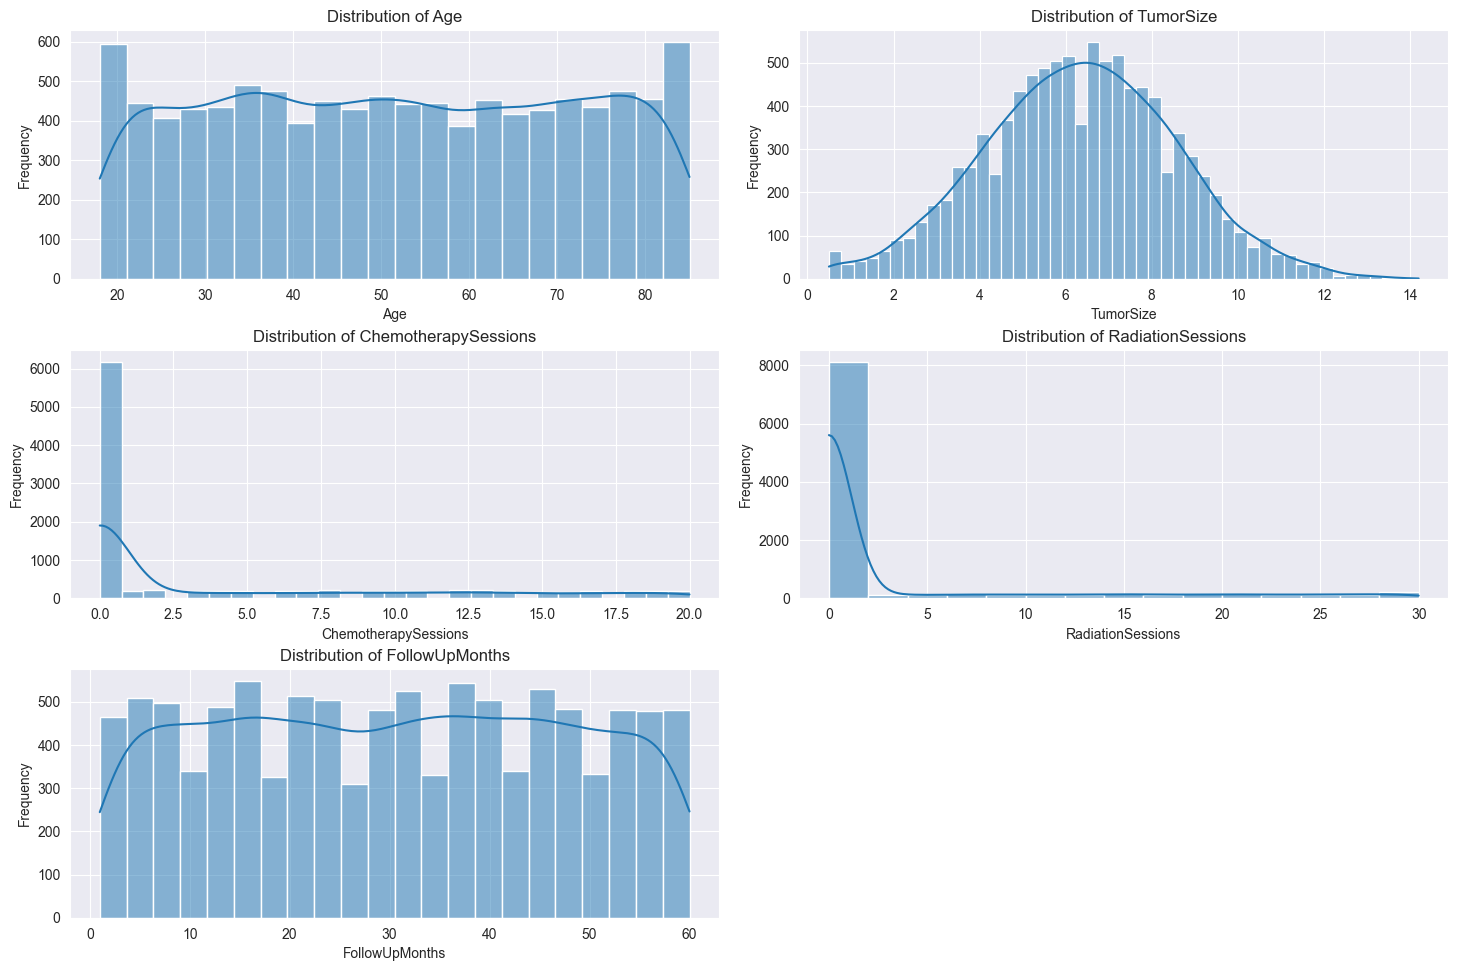

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = ['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths']

fig, axes = plt.subplots(3, 2, figsize=(15, 10)) # Griglia 3x2
fig.tight_layout(pad = 3) # Per lo spazio tra i grafici

axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(dataset[col], kde = True, ax = axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

fig.delaxes(axes[-1])

plt.show()

## Bivariate Analysis
The distribution of categorical features in relation to SurvivalStatus shows that:
- Male and female are almost equally distributed
- There are more patients in the province of Guangdong than in other provinces and most of them are alive
- Patients from Han are the most numerous
- The most common tumor type is Lung Cancer, followed by Liver Cancer and Stomach Cancer
- Patients who don't have metastases have a higher SurvivalStatus
- The most common treatment type is Chemotherapy, followed by Surgery and Radiation
- There are more patients alive
- The majority of patients alive are non-smokers and non-drinkers

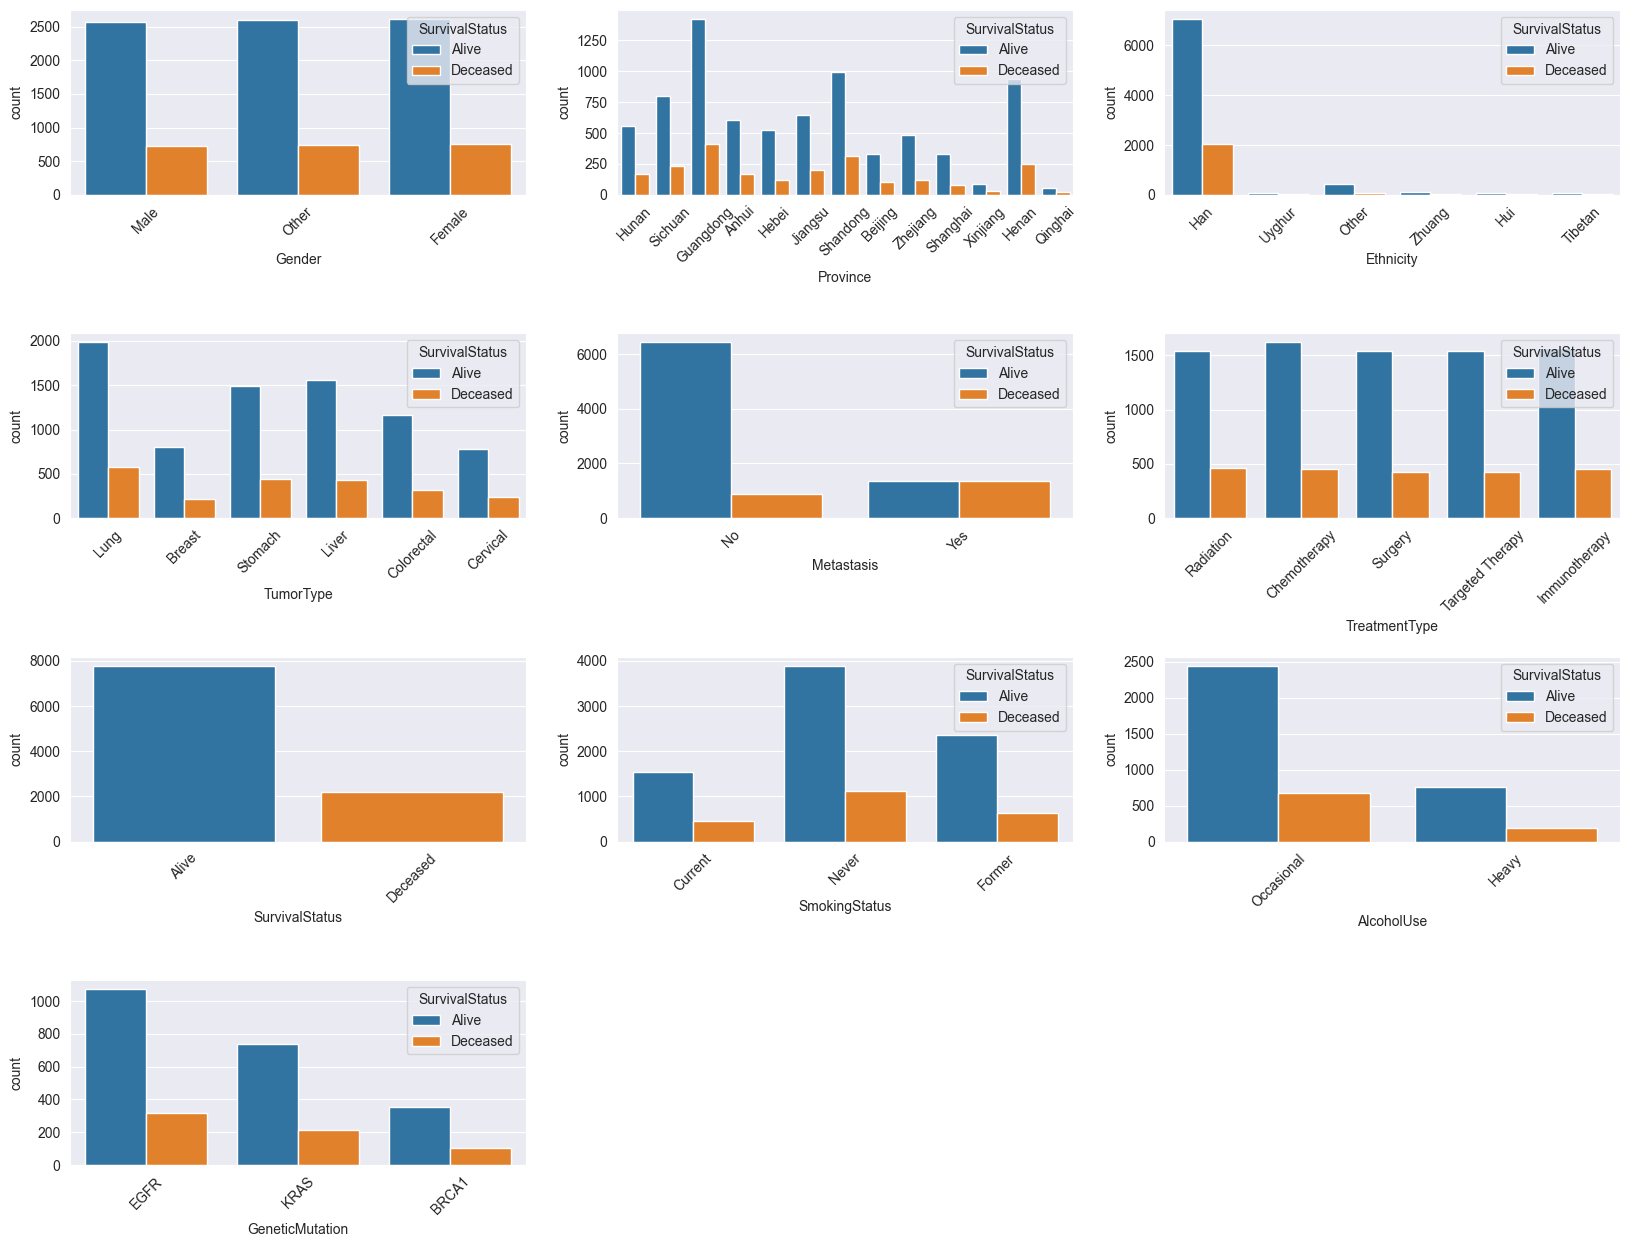

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

category_cols = ['Gender', 'Province', 'Ethnicity', 'TumorType',
                 'Metastasis', 'TreatmentType', 'SurvivalStatus',
                 'SmokingStatus', 'AlcoholUse', 'GeneticMutation']

fig, ax = plt.subplots(4, 3, figsize = (20, 15))

fig.subplots_adjust(hspace=0.75)

axes = ax.flatten()

for i, col in enumerate(category_cols):
    sns.countplot(dataset, x = col, hue='SurvivalStatus', ax = axes[i])
    axes[i].tick_params(axis = 'x', rotation=45)

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

The boxplot shows that:
- Age: has a uniform distribution between minimum and maximum values shown by "baffi?", the median is approximately 50, there are no outliers, and it is possible to calculate the size of the box as Q3-Q1
- TumorSize: is flatter and has outliers that is possible to calculate with Q3-Q1*1.25
- ChemotherapySessions: the values are concentrated in the first part
- RadiationSessions: the median is almost 0, with many outliers
- FollowUpMonths: has a uniform distribution between minimum and maximum values shown by "baffi?", there are no outliers, and it is possible to calculate the size of the box as Q3-Q1

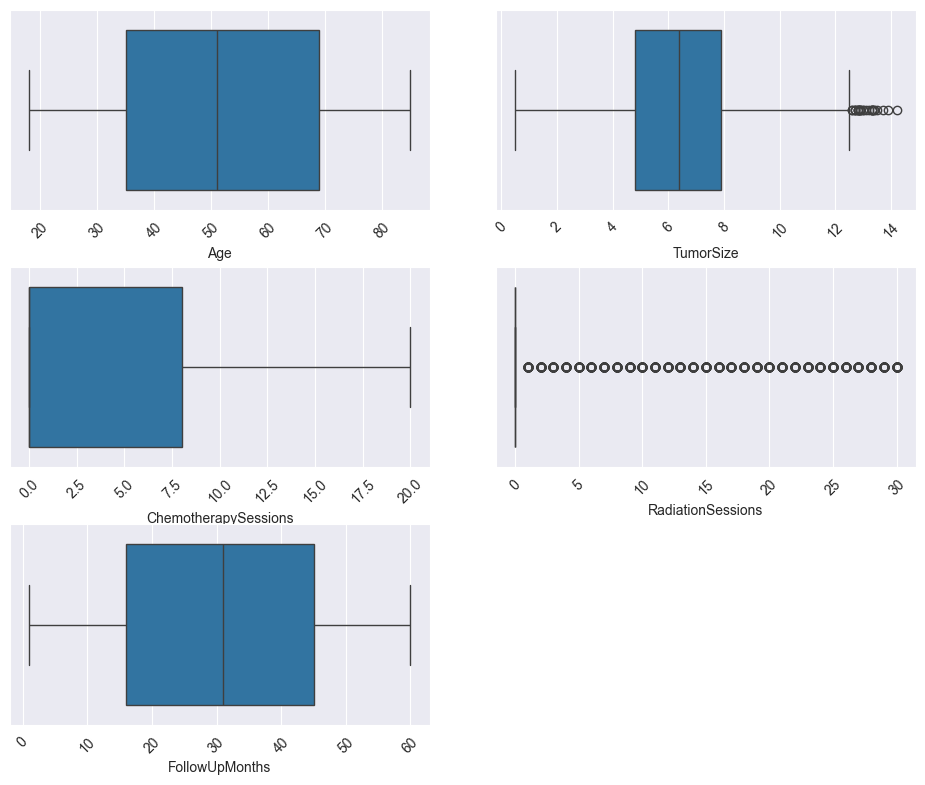

In [13]:
fig, ax = plt.subplots(3, 2, figsize = (10, 8))
fig.tight_layout(pad = 2)

axes = ax.flatten()
for i, col in enumerate(continuous_cols):
    sns.boxplot(dataset, x = col, ax = axes[i])
    axes[i].tick_params(axis = 'x', rotation = 45)

fig.delaxes(axes[-1])

The violin plots show a data visualization that combines a box plot with a kernel density plot to display the distribution of numerical data:
- Age has a bigger and uniform area
- There are many outliers in ChemotherapySessions and RadiationSessions

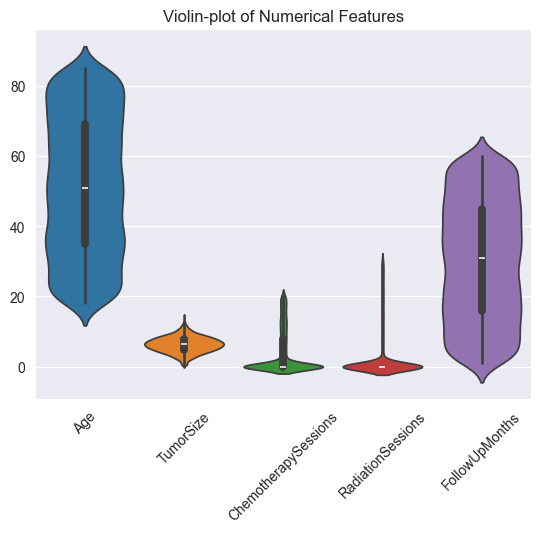

In [14]:
fig, ax = plt.subplots()
sns.violinplot(data=dataset, ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.set_title('Violin-plot of Numerical Features')

plt.show()

## The Pearson correlation coefficient
The Pearson correlation coefficient can take values included from -1 to 1 and is calculated:

$$ \rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y} $$

In the dataset there are no strong linear correlations.

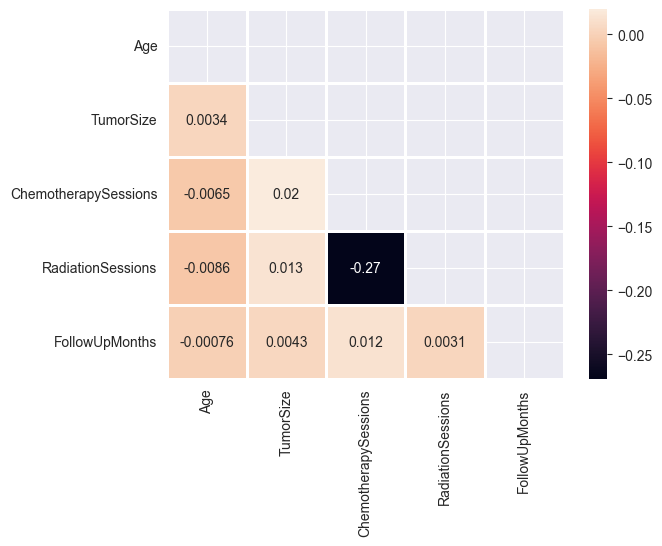

In [15]:
import numpy as np

correlation_matrix = dataset.corr(numeric_only = True)

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))


sns.heatmap(correlation_matrix,
            mask = mask,
            annot = True,
            linewidth = 2);